### Session on Word Embedding Case Study with Text Similarity Task - Muthu

- NLP allows machines to understand and extract patterns from such text data by applying various techniques such as text similarity, information retrieval, document classification, entity extraction, clustering.
- Text Similarity is one of the essential techniques of NLP which is being used to find the closeness between two chunks of text by it’s meaning or by surface.
- Computers require data to be converted into a numeric format to perform any machine learning task.
- In order to perform such tasks, various word embedding techniques are being used i.e., Bag of Words, TF-IDF, word2vec to encode the text data. 

### Methodology
- Text Pre-Processing
    - Removing non-ASCII values, special characters, HTML tags, stop words, raw format conversion 
- Feature Extraction
    - Bag-of-words, TF-IDF, Word2vec
- Vector Similarity
    - Cosine similarity, Euclidean distance, Jaccard distance, word mover’s distance
- Decision Function
    - Custom function needs to be defined to decide whether the score classifies the pair of chunks as similar or not

### Implementation Steps

#### Install - Packages

In [1]:
! pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
! pip install gensim

  Obtaining dependency information for gensim from https://files.pythonhosted.org/packages/ad/97/b8253236dfedb9094f4273393a3fd03997da81f27f15822e56128da894ae/gensim-4.3.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB 2.0 MB/s eta 0:00:12
   ---------------------------------------- 0.0/24.0 MB 2.0 MB/s eta 0:00:12
   ---------------------------------------- 0.1/24.0 MB 939.4 kB/s eta 0:00:26
   ---------------------------------------- 0.1/24.0 MB 939.4 kB/s eta 0:00:26
   ---------------------------------------- 0.1/24.0 MB 655.8 kB/s eta 0:00:37
   ---------------------------------------- 0.1/24.0 MB 655.8 kB/s eta 0:00:37
   ---------------------------------------- 0.1/24.0 MB 655.8 kB/s eta 0:00:37
   --------------------------------


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [189]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import gensim
import numpy as np

#### Pre-Processing

In [190]:
def pre_process(corpus):
    # convert input corpus to lower case.
    corpus = corpus.lower()
    # collecting a list of stop words from nltk and punctuation form
    # string class and create single array.
    stopset = stopwords.words('english') + list(string.punctuation)
    # remove stop words and punctuations from string.
    # word_tokenize is used to tokenize the input corpus in word tokens.
    corpus = " ".join([i for i in word_tokenize(corpus) if i not in stopset])
    # remove non-ascii characters
    corpus = unidecode(corpus)
    return corpus

In [191]:
pre_process("Sample of non ASCII: Ceñía. How to remove stopwords and punctuations?")

'sample non ascii cenia remove stopwords punctuations'

#### Lemmatization

In [192]:
lemmatizer = WordNetLemmatizer()
sentence = "I am taking NLP sessions on text similarity"
words = word_tokenize(sentence)
for w in words:
    print(w, " : ", lemmatizer.lemmatize(w))

I  :  I
am  :  am
taking  :  taking
NLP  :  NLP
sessions  :  session
on  :  on
text  :  text
similarity  :  similarity


### Corpus

In [193]:
## Sentence Pair
corpus = ["A girl is styling her hair.", "A girl is brushing her hair.",
          "I am teaching NLP"]

In [194]:
for c in range(len(corpus)):
    corpus[c] = pre_process(corpus[c])

### Feature Extraction

#### Count Vectorizer

In [195]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(corpus)

In [196]:
cv.vocabulary_

{'girl': 1, 'styling': 4, 'hair': 2, 'brushing': 0, 'teaching': 5, 'nlp': 3}

In [197]:
count_v_features = {}
for index,feature in enumerate(count_matrix.toarray()):
    count_v_features[index] = feature
    print(f"{corpus[index]} - > {feature}")

girl styling hair - > [0 1 1 0 1 0]
girl brushing hair - > [1 1 1 0 0 0]
teaching nlp - > [0 0 0 1 0 1]


#### TF-IDF

In [198]:
## creating vocabulary using uni-gram and bi-gram
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_vectorizer.fit(corpus)

TfidfVectorizer(ngram_range=(1, 2))

In [199]:
tfidf_vectorizer.vocabulary_

{'girl': 2,
 'styling': 7,
 'hair': 5,
 'girl styling': 4,
 'styling hair': 8,
 'brushing': 0,
 'girl brushing': 3,
 'brushing hair': 1,
 'teaching': 9,
 'nlp': 6,
 'teaching nlp': 10}

In [200]:
feature_vectors = tfidf_vectorizer.transform(corpus)

In [201]:
tf_idf_feature_vectors = {}
for index,feature in enumerate(feature_vectors.toarray()):
    tf_idf_feature_vectors[index] = feature

In [202]:
print(f"Sentence: {corpus[0]}\n\nFeature Representation: {feature_vectors.toarray()[0]}")

Sentence: girl styling hair

Feature Representation: [0.         0.         0.37302199 0.         0.49047908 0.37302199
 0.         0.49047908 0.49047908 0.         0.        ]


In [203]:
print(f"Sentence: {corpus[1]}\n\nFeature Representation: {feature_vectors.toarray()[1]}")

Sentence: girl brushing hair

Feature Representation: [0.49047908 0.49047908 0.37302199 0.49047908 0.         0.37302199
 0.         0.         0.         0.         0.        ]


In [204]:
print(f"Sentence: {corpus[2]}\n\nFeature Representation: {feature_vectors.toarray()[2]}")

Sentence: teaching nlp

Feature Representation: [0.         0.         0.         0.         0.         0.
 0.57735027 0.         0.         0.57735027 0.57735027]


In [205]:
mapped_features = {}
for word, index in tfidf_vectorizer.vocabulary_.items():
    mapped_features[word] = feature_vectors.toarray()[0][index]
print(f"{corpus[0]}\n")
for word,feature_weight in mapped_features.items():
    print(f"{word} - > {feature_weight}")

girl styling hair

girl - > 0.3730219858594306
styling - > 0.49047908420610337
hair - > 0.3730219858594306
girl styling - > 0.49047908420610337
styling hair - > 0.49047908420610337
brushing - > 0.0
girl brushing - > 0.0
brushing hair - > 0.0
teaching - > 0.0
nlp - > 0.0
teaching nlp - > 0.0


In [206]:
mapped_features = {}
for word, index in tfidf_vectorizer.vocabulary_.items():
    mapped_features[word] = feature_vectors.toarray()[1][index]
print(f"{corpus[1]}\n")
for word,feature_weight in mapped_features.items():
    print(f"{word} - > {feature_weight}")

girl brushing hair

girl - > 0.3730219858594306
styling - > 0.0
hair - > 0.3730219858594306
girl styling - > 0.0
styling hair - > 0.0
brushing - > 0.49047908420610337
girl brushing - > 0.49047908420610337
brushing hair - > 0.49047908420610337
teaching - > 0.0
nlp - > 0.0
teaching nlp - > 0.0


In [207]:
mapped_features = {}
for word, index in tfidf_vectorizer.vocabulary_.items():
    mapped_features[word] = feature_vectors.toarray()[2][index]
print(f"{corpus[2]}\n")
for word,feature_weight in mapped_features.items():
    print(f"{word} - > {feature_weight}")

teaching nlp

girl - > 0.0
styling - > 0.0
hair - > 0.0
girl styling - > 0.0
styling hair - > 0.0
brushing - > 0.0
girl brushing - > 0.0
brushing hair - > 0.0
teaching - > 0.5773502691896257
nlp - > 0.5773502691896257
teaching nlp - > 0.5773502691896257


#### Word2vec
- CBoW
- Skip-gram

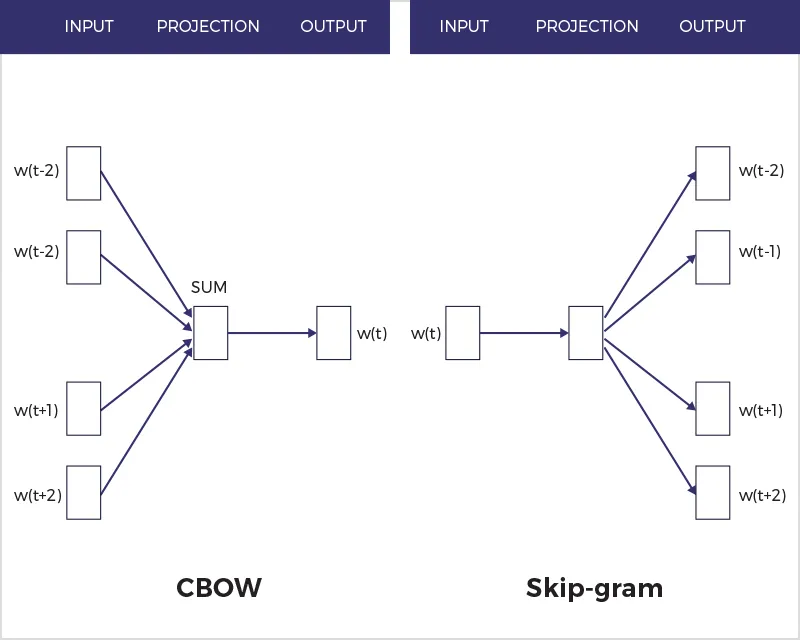

- we are using a pre-trained model trained on Wikipedia dataset
- This model has approximately 6 lakhs words in the vocabulary
- word is represented with 300 vector length

```https://github.com/piskvorky/gensim-data```

In [48]:
## Loading the model
wv = api.load('word2vec-google-news-300')

In [49]:
vocab = wv.index_to_key

In [50]:
feature_vectors = {}
for index,sentence in enumerate(corpus):
    words = sentence.split()
    ##Fliter out the words not in vocab
    words = [word for word in words if word in vocab]
    feature_representation = np.mean(wv[words], axis=0)
    
    feature_vectors[index] = feature_representation

In [51]:
feature_vectors

{0: array([ 8.65885392e-02,  1.96233109e-01,  1.49088547e-01, -3.67838554e-02,
         9.23665334e-03,  5.37923165e-02,  2.03247070e-02, -3.33333343e-01,
         6.61214218e-02,  9.99348983e-02, -5.97330742e-02, -2.35677078e-01,
         1.22070312e-03,  3.23893242e-02, -3.51562500e-02, -2.36206055e-02,
        -2.53906250e-02,  1.78977966e-01,  1.09293617e-01, -2.20865890e-01,
        -1.85620621e-01,  1.02864586e-01,  2.54160557e-02, -2.72827148e-02,
         7.81250000e-03, -9.53776017e-02, -9.55810547e-02,  2.78320312e-02,
         3.97786468e-01, -2.84505218e-01, -9.39331055e-02,  1.52994797e-01,
         6.00585938e-02,  5.72916679e-02, -1.24674477e-01, -2.00846359e-01,
         2.70996094e-01, -6.74641952e-02, -6.70572892e-02,  7.45442733e-02,
         7.10042333e-03, -1.88883469e-01,  6.70572892e-02, -8.13802064e-04,
         2.48209629e-02, -1.68294266e-01, -8.13802108e-02,  1.06526695e-01,
         2.15169266e-01,  4.47998047e-02,  2.19726562e-02,  6.04248047e-02,
        -

In [52]:
for index, rep in feature_vectors.items():
    print(f"Sentence: {corpus[index]} -> Representation: {rep}")
    print()

Sentence: girl styling hair -> Representation: [ 8.65885392e-02  1.96233109e-01  1.49088547e-01 -3.67838554e-02
  9.23665334e-03  5.37923165e-02  2.03247070e-02 -3.33333343e-01
  6.61214218e-02  9.99348983e-02 -5.97330742e-02 -2.35677078e-01
  1.22070312e-03  3.23893242e-02 -3.51562500e-02 -2.36206055e-02
 -2.53906250e-02  1.78977966e-01  1.09293617e-01 -2.20865890e-01
 -1.85620621e-01  1.02864586e-01  2.54160557e-02 -2.72827148e-02
  7.81250000e-03 -9.53776017e-02 -9.55810547e-02  2.78320312e-02
  3.97786468e-01 -2.84505218e-01 -9.39331055e-02  1.52994797e-01
  6.00585938e-02  5.72916679e-02 -1.24674477e-01 -2.00846359e-01
  2.70996094e-01 -6.74641952e-02 -6.70572892e-02  7.45442733e-02
  7.10042333e-03 -1.88883469e-01  6.70572892e-02 -8.13802064e-04
  2.48209629e-02 -1.68294266e-01 -8.13802108e-02  1.06526695e-01
  2.15169266e-01  4.47998047e-02  2.19726562e-02  6.04248047e-02
 -4.07536834e-04  3.66210938e-03  1.26464844e-01  8.65681935e-03
  6.89665461e-03  1.78548172e-01 -2.7994791

#### CBOW in Scale

In [208]:
cbow = Word2Vec(corpus, vector_size=10, window=2, min_count=2, sg=0)
vocab = cbow.wv.index_to_key

In [209]:
def get_mean_vector(model, sentence):
    words = [word for word in sentence if word in vocab]
    if len(words) >= 1:
        return np.mean(model.wv[words], axis=0)
    return np.zeros((10,)) 

In [210]:
print(corpus[0])
get_mean_vector(cbow, corpus[0])

girl styling hair


array([-0.00123658,  0.01716655,  0.01564999,  0.00385812, -0.00993243,
       -0.01752137,  0.024432  ,  0.01868356, -0.03467562, -0.01247166],
      dtype=float32)

In [211]:
print(corpus[1])
get_mean_vector(cbow, corpus[1])

girl brushing hair


array([-0.00115297,  0.02150196,  0.01360718,  0.00198636, -0.00148183,
       -0.02254562,  0.0158028 ,  0.02784811, -0.03260864, -0.0148199 ],
      dtype=float32)

In [212]:
print(corpus[2])
get_mean_vector(cbow, corpus[2])

teaching nlp


array([-2.6223214e-02,  2.5883056e-02, -7.9442095e-03, -4.8076957e-03,
       -2.6592361e-03, -1.6909322e-02,  3.4925006e-02,  5.6221252e-05,
       -2.6520673e-02,  1.1542794e-02], dtype=float32)

In [213]:
cbow_features = {}
for i in range(len(corpus)):
    cbow_features[i] = get_mean_vector(cbow,corpus[i])

#### Skipgram in Scale

In [214]:
sg = Word2Vec(corpus, vector_size=10, window=2, min_count=2, sg=1)
vocab = sg.wv.index_to_key

In [215]:
def get_mean_vector(model, sentence):
    words = [word for word in sentence if word in vocab]
    if len(words) >= 1:
        return np.mean(model.wv[words], axis=0)
    return np.zeros((10,)) 

In [216]:
print(corpus[0])
f_1_sg = get_mean_vector(sg, corpus[0])
f_1_sg

girl styling hair


array([-0.00123695,  0.01718122,  0.01563962,  0.00389477, -0.00996329,
       -0.01754478,  0.02445518,  0.01871149, -0.0347101 , -0.01247996],
      dtype=float32)

In [217]:
print(corpus[1])
f_2_sg = get_mean_vector(sg, corpus[1])
f_2_sg

girl brushing hair


array([-0.00115417,  0.02151943,  0.01359758,  0.00202882, -0.00151685,
       -0.02257293,  0.01583036,  0.02787986, -0.0326482 , -0.01482794],
      dtype=float32)

In [218]:
print(corpus[2])
f_3_sg = get_mean_vector(sg, corpus[2])
f_3_sg

teaching nlp


array([-2.6208855e-02,  2.5894813e-02, -7.9556508e-03, -4.7582248e-03,
       -2.6941849e-03, -1.6939800e-02,  3.4965374e-02,  7.6026969e-05,
       -2.6574034e-02,  1.1513758e-02], dtype=float32)

In [219]:
skg_features = {}
for i in range(len(corpus)):
    skg_features[i] = get_mean_vector(sg,corpus[i])

#### Glove Representation

In [220]:
glove_model = api.load("glove-wiki-gigaword-100")

In [221]:
def compute_glove_embedding(sentence):
    tokens = sentence.split()
    return sum([glove_model[word] for word in tokens if word in glove_model]) / len(tokens)

In [222]:
glove_f_1 = compute_glove_embedding(corpus[0])
glove_f_1

array([ 2.57869989e-01,  1.17170669e-01,  2.07236648e-01, -3.37153345e-01,
       -1.67936683e-02,  1.81887344e-01,  2.19492331e-01,  8.73150051e-01,
       -1.03791006e-01,  6.12100005e-01, -2.59686679e-01, -7.51099959e-02,
        5.15866697e-01,  6.21613324e-01,  5.81789970e-01,  8.18459988e-01,
       -2.90603310e-01, -9.26336572e-02,  3.56406689e-01,  4.06971693e-01,
       -2.85504311e-01, -2.09813356e-01, -1.62178174e-01, -2.52899528e-03,
        5.22166669e-01,  8.15616608e-01, -2.47236684e-01, -9.54693317e-01,
       -1.06666677e-01, -1.28159985e-01,  4.34076667e-01,  1.09366083e-03,
       -6.13533072e-02, -2.25856662e-01,  1.65414989e-01,  1.11883394e-02,
       -3.06544721e-01, -6.97523355e-02,  1.83693334e-01, -1.57739997e-01,
        1.18173338e-01, -4.91090029e-01,  6.81000948e-03, -2.71396667e-01,
       -4.86207962e-01,  5.24813354e-01, -1.15819998e-01,  4.84580010e-01,
        3.89294654e-01, -3.61416668e-01, -8.16496313e-02, -7.75516704e-02,
       -4.80466671e-02,  

In [223]:
glove_f_2 = compute_glove_embedding(corpus[1])
glove_f_2

array([ 0.10750666,  0.10259   ,  0.15086333, -0.27907065, -0.13613367,
        0.49816403, -0.18938434,  0.94424003, -0.082729  ,  0.36481366,
       -0.297629  ,  0.00647333,  0.6938467 ,  0.69576335,  0.48115668,
        0.40966   , -0.18503666, -0.08548499,  0.30274335,  0.189215  ,
       -0.37898406,  0.41188002, -0.09144149,  0.14110333,  0.77831   ,
        1.20692   , -0.18408   , -0.90574336, -0.12859668, -0.04472332,
        0.30469665, -0.10487   ,  0.23751335, -0.03713667, -0.07275033,
       -0.1904472 , -0.5188367 , -0.3628583 ,  0.29274833,  0.05374667,
       -0.3565333 , -0.44817665, -0.16572966, -0.46209335, -0.44281802,
        0.25220335, -0.32665667,  0.4054297 ,  0.37659767, -0.48613   ,
        0.01273667,  0.056176  ,  0.28740668,  1.2866    , -0.286464  ,
       -1.136407  , -0.34596333,  0.24043   ,  0.496953  ,  0.25868702,
        0.70909   ,  0.8578666 , -0.25586668,  0.38857388,  0.5330073 ,
        0.13644867,  0.639379  , -0.10596267,  0.05857332, -0.06

In [224]:
glove_f_3 = compute_glove_embedding(corpus[2])
glove_f_3

array([ 0.1944    ,  0.87540495, -0.71891   ,  0.15180501,  0.14937499,
       -0.01243502,  0.5436245 , -0.3550425 ,  0.09663001,  0.4289365 ,
       -0.20771049, -0.6017    , -0.139855  ,  0.61508   ,  0.352325  ,
       -0.48890498,  0.314965  ,  0.02661   ,  0.302605  ,  0.49595   ,
       -0.71871996,  0.0081696 ,  0.400455  , -0.12367701, -0.40079498,
       -0.370865  , -0.0253885 , -0.04298502, -0.328495  ,  0.374865  ,
       -1.099     ,  0.175475  , -0.05109   , -0.1075275 , -0.50435   ,
        0.23069   , -0.6331125 ,  0.40295   , -0.34845   , -0.36143   ,
       -0.563055  ,  0.08287501,  0.039091  , -0.393519  , -0.74593   ,
       -0.25984502, -0.010485  , -0.25831002,  0.051654  , -0.13392001,
       -0.2321375 , -0.324555  , -0.211165  ,  0.15131499, -0.103782  ,
       -0.04820001,  0.46266   , -0.57432497,  0.571005  , -0.0948985 ,
        0.50865996, -0.33578503,  0.064917  , -0.44766   ,  0.042868  ,
        0.185245  ,  0.090965  , -0.1204805 ,  0.28327748,  0.73

#### Vector Similarity

In [225]:
def get_cosine_similarity(feature_vec_1, feature_vec_2):    
    return cosine_similarity(feature_vec_1.reshape(1, -1), feature_vec_2.reshape(1, -1))[0][0]

#### Bag of Words Representation

In [226]:
print(f"Cosine Similiarity between `{corpus[0]}` and `{corpus[1]}`: {get_cosine_similarity(count_v_features[0],count_v_features[1])}")

Cosine Similiarity between `girl styling hair` and `girl brushing hair`: 0.6666666666666669


In [227]:
print(f"Cosine Similiarity between `{corpus[0]}` and `{corpus[2]}`: {get_cosine_similarity(count_v_features[0],count_v_features[2])}")

Cosine Similiarity between `girl styling hair` and `teaching nlp`: 0.0


In [228]:
print(f"Cosine Similiarity between `{corpus[1]}` and `{corpus[2]}`: {get_cosine_similarity(count_v_features[1],count_v_features[2])}")

Cosine Similiarity between `girl brushing hair` and `teaching nlp`: 0.0


#### TF-IDF Results

In [229]:
print(f"Cosine Similiarity between `{corpus[0]}` and `{corpus[1]}`: {get_cosine_similarity(tf_idf_feature_vectors[0],tf_idf_feature_vectors[1])}")

Cosine Similiarity between `girl styling hair` and `girl brushing hair`: 0.27829080386902655


In [230]:
print(f"Cosine Similiarity between `{corpus[0]}` and `{corpus[2]}`: {get_cosine_similarity(tf_idf_feature_vectors[0],tf_idf_feature_vectors[2])}")

Cosine Similiarity between `girl styling hair` and `teaching nlp`: 0.0


In [231]:
print(f"Cosine Similiarity between `{corpus[1]}` and `{corpus[2]}`: {get_cosine_similarity(tf_idf_feature_vectors[1],tf_idf_feature_vectors[2])}")

Cosine Similiarity between `girl brushing hair` and `teaching nlp`: 0.0


#### CBOW Results

In [232]:
print(f"Cosine Similiarity between `{corpus[0]}` and `{corpus[1]}`: {get_cosine_similarity(cbow_features[0],cbow_features[1])}")

Cosine Similiarity between `girl styling hair` and `girl brushing hair`: 0.9571976661682129


In [233]:
 print(f"Cosine Similiarity between `{corpus[0]}` and `{corpus[2]}`: {get_cosine_similarity(cbow_features[0],cbow_features[2])}")

Cosine Similiarity between `girl styling hair` and `teaching nlp`: 0.6496812701225281


In [234]:
 print(f"Cosine Similiarity between `{corpus[1]}` and `{corpus[2]}`: {get_cosine_similarity(cbow_features[1],cbow_features[2])}")

Cosine Similiarity between `girl brushing hair` and `teaching nlp`: 0.5791294574737549


#### Skipgram Results

In [235]:
print(f"Cosine Similiarity between `{corpus[0]}` and `{corpus[1]}`: {get_cosine_similarity(skg_features[0],skg_features[1])}")

Cosine Similiarity between `girl styling hair` and `girl brushing hair`: 0.9572986364364624


In [236]:
print(f"Cosine Similiarity between `{corpus[0]}` and `{corpus[2]}`: {get_cosine_similarity(skg_features[0],skg_features[2])}")

Cosine Similiarity between `girl styling hair` and `teaching nlp`: 0.6505264639854431


In [237]:
print(f"Cosine Similiarity between `{corpus[1]}` and `{corpus[2]}`: {get_cosine_similarity(skg_features[1],skg_features[2])}")

Cosine Similiarity between `girl brushing hair` and `teaching nlp`: 0.5800262689590454


#### Glove Results

In [238]:
print(f"Cosine Similiarity between `{corpus[0]}` and `{corpus[1]}`: {get_cosine_similarity(glove_f_1,glove_f_2)}")

Cosine Similiarity between `girl styling hair` and `girl brushing hair`: 0.881434440612793


In [239]:
print(f"Cosine Similiarity between `{corpus[0]}` and `{corpus[2]}`: {get_cosine_similarity(glove_f_1,glove_f_3)}")

Cosine Similiarity between `girl styling hair` and `teaching nlp`: 0.12707242369651794


In [240]:
print(f"Cosine Similiarity between `{corpus[1]}` and `{corpus[2]}`: {get_cosine_similarity(glove_f_2,glove_f_3)}")

Cosine Similiarity between `girl brushing hair` and `teaching nlp`: 0.0933074802160263
